In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('olympics.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.shape

(70000, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
(df.isnull().sum()/len(df))*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.902857
Height    23.220000
Weight    24.430000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.157143
dtype: float64

In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [8]:
df.duplicated().sum()

383

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

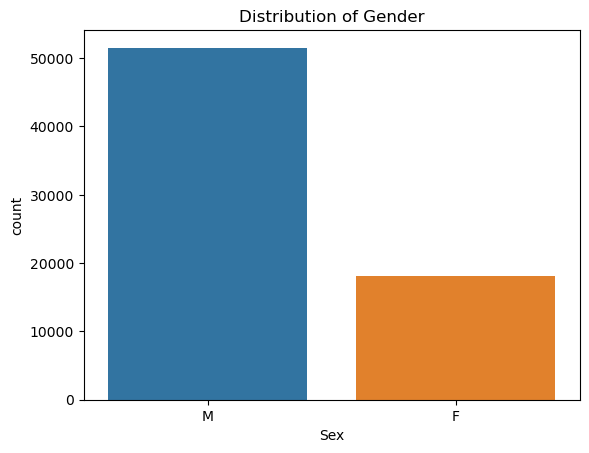

In [11]:
sns.countplot(x='Sex',data=df)
plt.title('Distribution of Gender')
plt.show()

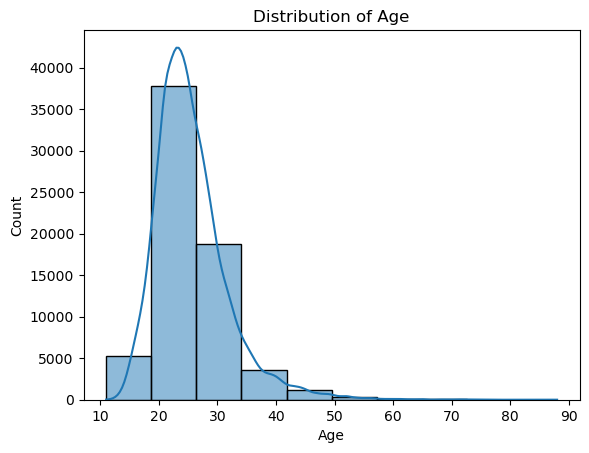

In [14]:
sns.histplot(x='Age',bins=10,kde=True,data=df)
plt.title('Distribution of Age')
plt.show()

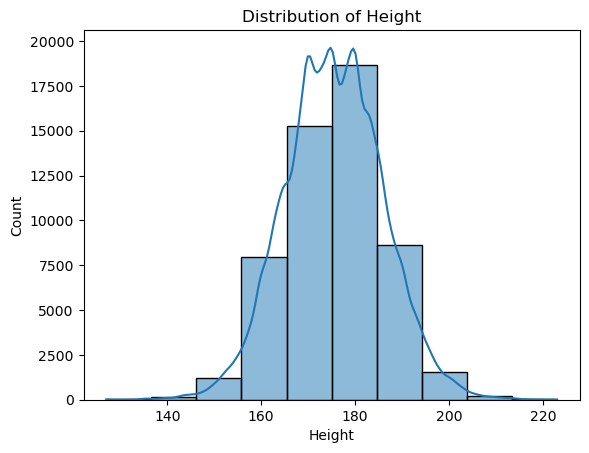

In [15]:
sns.histplot(x='Height',bins=10,kde=True,data=df)
plt.title('Distribution of Height')
plt.show()

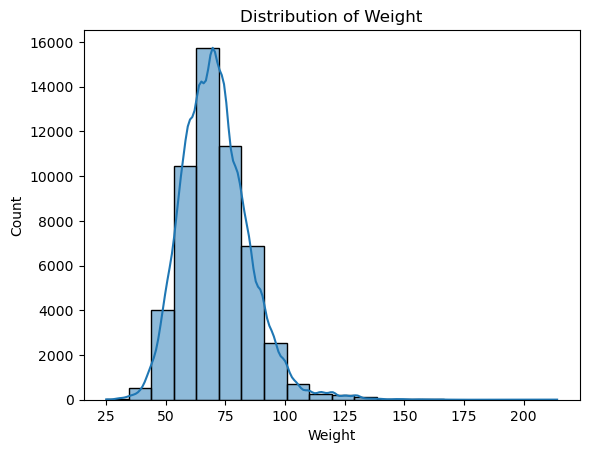

In [17]:
sns.histplot(x='Weight',bins=20,kde=True,data=df)
plt.title('Distribution of Weight')
plt.show()

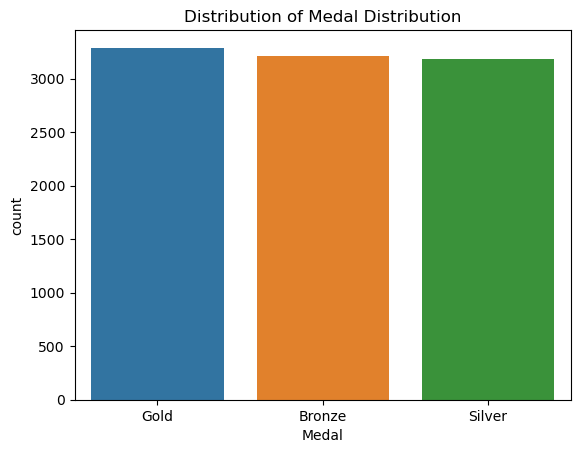

In [19]:
sns.countplot(x='Medal',data=df)
plt.title('Distribution of Medal Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

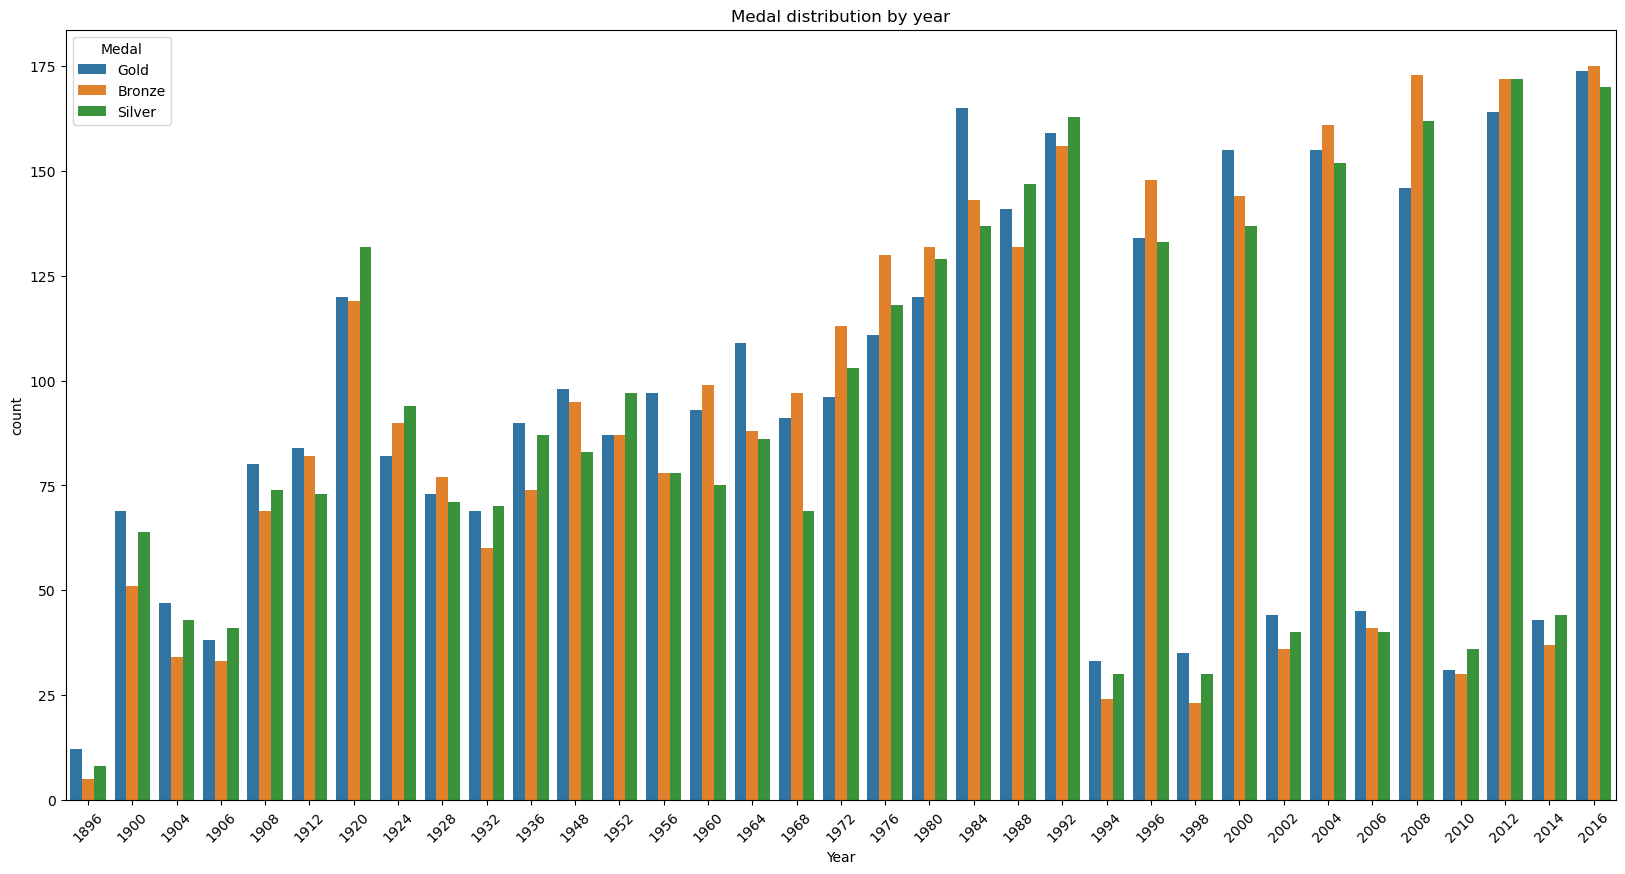

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='Year',hue='Medal',data=df)
plt.title('Medal distribution by year')
plt.xticks(rotation = 45)
plt.show

In [22]:
year_avg_age = df.groupby('Year')['Age'].mean()
year_avg_age

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64

In [25]:
season_avg_height = df.groupby(['Season','Sex'])['Height'].mean()
season_avg_height

Season  Sex
Summer  F      168.203381
        M      178.811064
Winter  F      166.666214
        M      178.800253
Name: Height, dtype: float64

In [36]:
height_by_sport = df.groupby('Sport')['Height'].median()
height_by_sport.head(8).sort_values(ascending=False)

Sport
Basketball          190.0
Art Competitions    183.0
Baseball            183.0
Athletics           176.0
Badminton           175.0
Alpine Skiing       173.0
Archery             172.0
Alpinism              NaN
Name: Height, dtype: float64

In [37]:
height_by_sport[height_by_sport == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [38]:
height_by_sport.min()

164.0

In [39]:
height_by_sport[height_by_sport == 164]

Sport
Gymnastics    164.0
Name: Height, dtype: float64

In [56]:
ax = df.groupby(['NOC','Sex'])['Sex'].size()
ax

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: Sex, Length: 432, dtype: int64

In [61]:
gold_medals_by_country = df[df['Medal'] == 'Gold'].groupby(['NOC','Medal'])['Medal'].size()
gold_medals_by_country

NOC  Medal
ALG  Gold       1
ANZ  Gold       7
ARG  Gold      25
ARM  Gold       1
AUS  Gold      98
             ... 
URU  Gold      13
USA  Gold     747
UZB  Gold       4
YUG  Gold      31
ZIM  Gold       7
Name: Medal, Length: 84, dtype: int64

In [74]:
gold_medals_by_country[gold_medals_by_country == 747]

NOC  Medal
USA  Gold     747
Name: Medal, dtype: int64

In [76]:
weight_by_sport = df.groupby(['Sport','Sex'])['Weight'].mean()
weight_by_sport

Sport          Sex
Alpine Skiing  F      62.154589
               M      77.725309
Alpinism       F            NaN
               M            NaN
Archery        F      61.023256
                        ...    
Water Polo     M      87.584973
Weightlifting  F      66.189474
               M      79.927852
Wrestling      F      58.169014
               M      77.256240
Name: Weight, Length: 114, dtype: float64

In [78]:
#Female atheletes weight
weight_by_sport['Football']['F']

62.14746543778802

In [90]:
sports_event_count = df.groupby('Sport')['Event'].nunique().sort_values(ascending=False)
sports_event_count

Sport
Athletics              83
Shooting               81
Swimming               54
Cycling                42
Sailing                37
                       ..
Polo                    1
Military Ski Patrol     1
Alpinism                1
Jeu De Paume            1
Lacrosse                1
Name: Event, Length: 65, dtype: int64

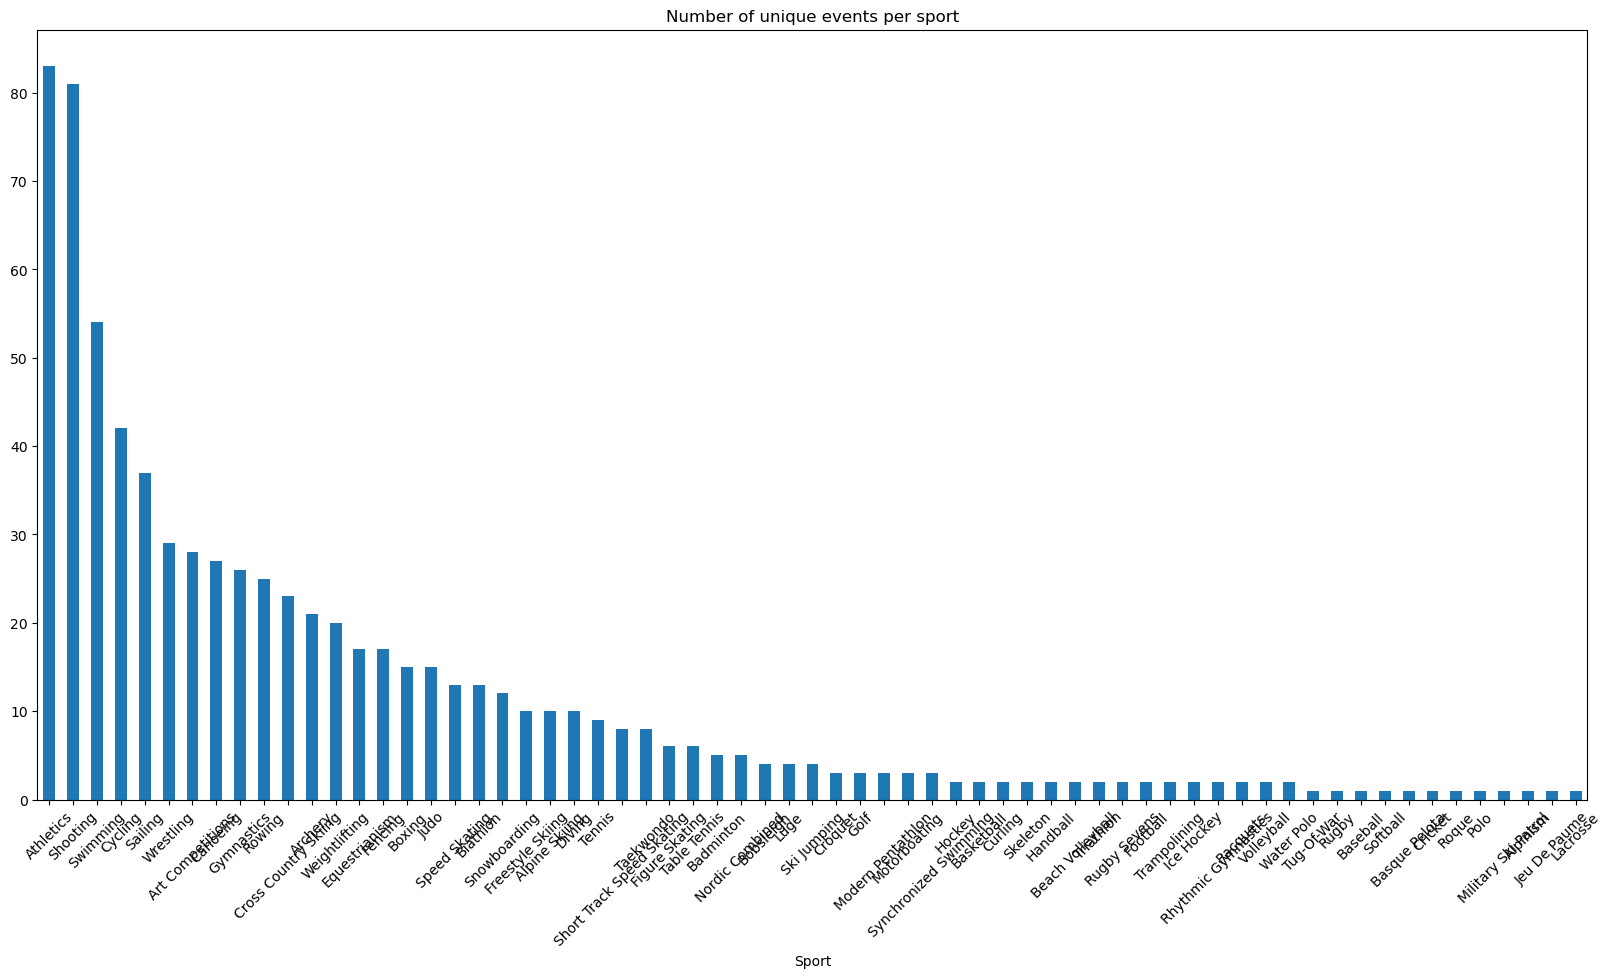

In [91]:
plt.figure(figsize=(20,10))
sports_event_count.plot(kind = 'bar')
plt.title('Number of unique events per sport')
plt.xticks(rotation=45)
plt.show()

In [94]:
year_participants = df.groupby('Year')['ID'].nunique()
year_participants

Year
1896      34
1900     433
1904     167
1906     203
1908     578
1912     609
1920     797
1924    1060
1928     990
1932     591
1936    1327
1948    1456
1952    1518
1956    1071
1960    1637
1964    1551
1968    1758
1972    2111
1976    1848
1980    1651
1984    2237
1988    2622
1992    2892
1994     420
1996    2677
1998     510
2000    2796
2002     536
2004    2719
2006     565
2008    2792
2010     521
2012    2769
2014     605
2016    3003
Name: ID, dtype: int64

<AxesSubplot:xlabel='Year'>

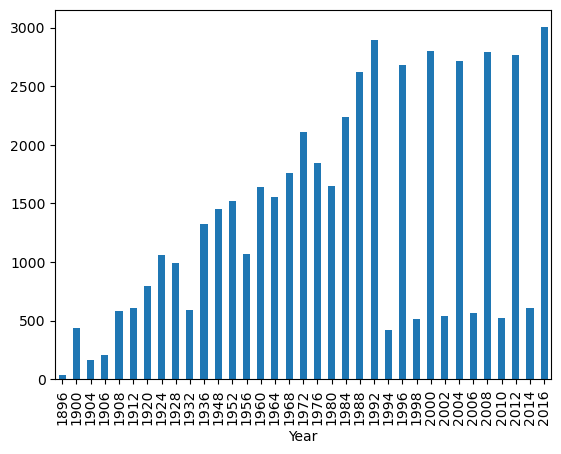

In [95]:
year_participants.plot(kind='bar')

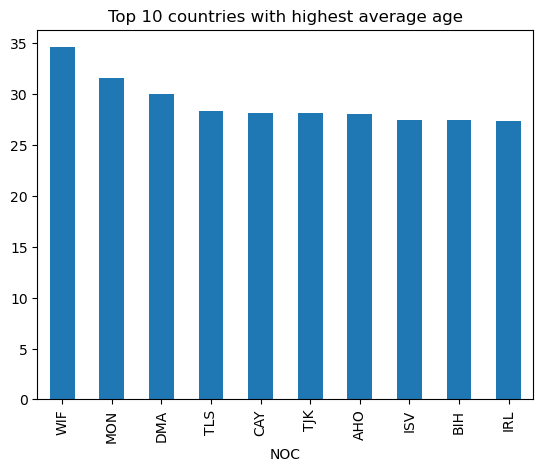

In [101]:
country_avg_age = df.groupby('NOC')['Age'].mean().sort_values(ascending=False)
country_avg_age.head(10).plot(kind='bar')
plt.title('Top 10 countries with highest average age')
plt.show()

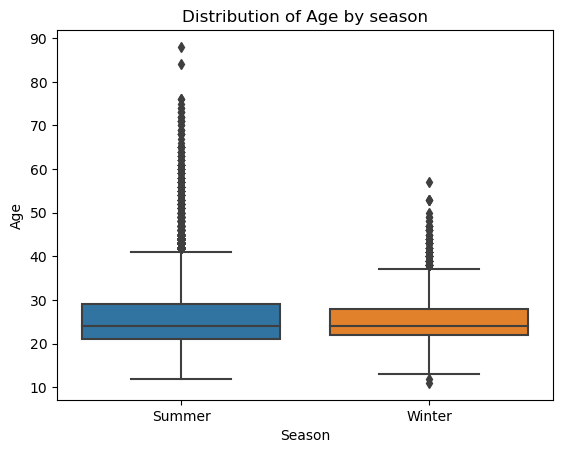

In [103]:
sns.boxplot(data=df,x='Season',y='Age')
plt.title('Distribution of Age by season')
plt.show()

In [111]:
most_medals_country = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)
most_medals_country.head(1)

NOC
USA    1561
Name: Medal, dtype: int64

In [115]:
tallest_athlete = df[df['Height'] == df['Height'].max()]
tallest_athlete[['Name','Height','NOC','Sport']]

,Name,Height,NOC,Sport
32376,Tommy Loren Burleson,223.0,USA,Basketball


In [116]:
heaviest_athlete = df[df['Weight'] == df['Weight'].max()]
heaviest_athlete[['Name','Weight','NOC','Sport']]

,Name,Weight,NOC,Sport
23155,"Ricardo Blas, Jr.",214.0,GUM,Judo
23156,"Ricardo Blas, Jr.",214.0,GUM,Judo


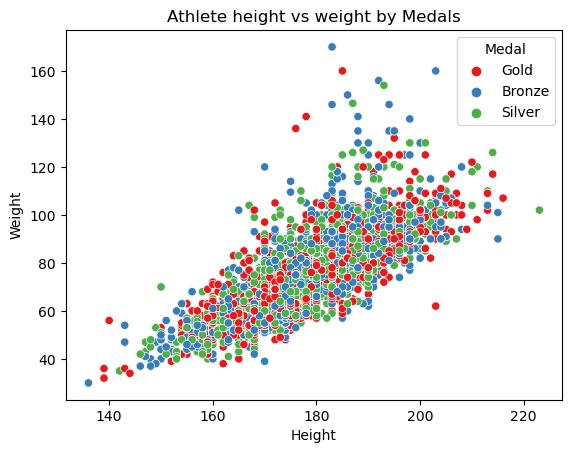

In [119]:
sns.scatterplot(data=df,x='Height',y='Weight',hue='Medal',palette='Set1')
plt.title('Athlete height vs weight by Medals')
plt.show()

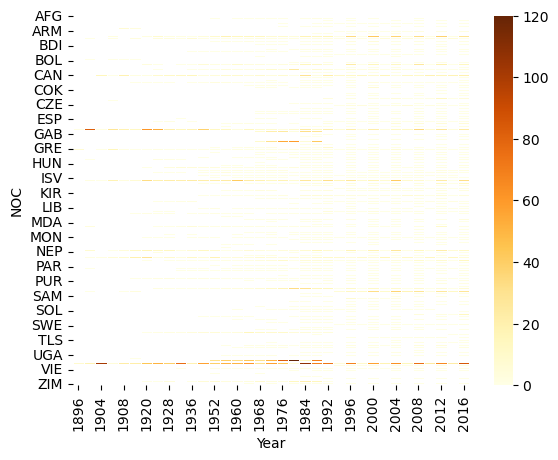

In [133]:
medals_by_country_year = df.pivot_table(index='NOC',columns='Year',values='Medal',aggfunc='count')
sns.heatmap(medals_by_country_year,cmap='YlOrBr',linewidths=0.5)
plt.show()